<a href="https://colab.research.google.com/github/IgorElder/Alura/blob/main/MATERIAL_Python__Trabalhando_com_dados_nulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste material, vamos entender as formas de trabalhar com dados nulos disponíveis na biblioteca Pandas.

> ***Nota:*** *Todos os dados utilizados nos exemplos desse notebook são fictícios.*

**Mas o que são dados nulos?**
  - Dados nulos representam informações vazias, inexistentes ou que não foram preenchidas.
  - No Pandas, os dados nulos são comumente representados pelo tipo `NaN`. No entanto, dependendo do tipo de dado na coluna, o valor ausente pode ser representado como `Na` (para strings) ou `NaT` (para datas e horários).

Vamos usar um pequeno DataFrame para explorar, de forma prática, as funções que o [`pandas`](https://pandas.pydata.org/docs/) fornece para manipular dados ausentes.

In [ ]:
import pandas as pd

Nosso conjunto de dados contém apenas duas colunas sem dados nulos: `id_vendedor` e `valor_unidade`. Outro detalhe é que somente a primeira linha não possui dados nulos.

In [ ]:
vendas = {
    "id_vendedor": [101, 102, 103, 104, 105],
    "id_cliente": [201, None, 203, 204, None],
    "quantidade_compras": [5, 3, None, 2, None],
    "valor_unidade": [20.0, 15.5, 10.0, 4.0, 25.0],
    "valor_total": [100.0, 46.5, None, None, 125.0]
}
df = pd.DataFrame(vendas)
df

,id_vendedor,id_cliente,quantidade_compras,valor_unidade,valor_total
0,101,201.0,5.0,20.0,100.0
1,102,NaN,3.0,15.5,46.5
2,103,203.0,NaN,10.0,NaN
3,104,204.0,2.0,4.0,NaN
4,105,NaN,NaN,25.0,125.0


A primeira coisa que faremos é identificar os dados nulos.

## 1 Encontrar valores nulos

A função [`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) identifica valores ausentes no DataFrame.

In [ ]:
df.isnull()

,id_vendedor,id_cliente,quantidade_compras,valor_unidade,valor_total
0,False,False,False,False,False
1,False,True,False,False,False
2,False,False,True,False,True
3,False,False,False,False,True
4,False,True,True,False,False


Semelhante ao `isnull()`, temos o [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html).
- O `isna()` executa a mesma funcionalidade do `isnull()` e a escolha entre eles depende da preferência de quem programa.

De modo divergente, para identificar os valores **não ausentes**, usamos [`notnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notnull.html) ou [`notna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html) (a funcionalidade inversa de `isnull()` e `isna()`).

Lembre-se de que podemos utilizar todos esses métodos em colunas específicas do DataFrame também.

In [ ]:
df["valor_total"].isnull()

,valor_total
0,False
1,False
2,True
3,True
4,False


A partir do resultado acima, podemos verificar as linhas que têm valores nulos nessa coluna, observando os dados correspondentes:

In [ ]:
df[df["valor_total"].isnull()]

,id_vendedor,id_cliente,quantidade_compras,valor_unidade,valor_total
2,103,203.0,NaN,10.0,NaN
3,104,204.0,2.0,4.0,NaN


Uma **dica**: normalmente usamos o método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) para identificar informações gerais sobre o DataFrame, mas ele também pode ser útil para verificar a quantidade de valores **não nulos** presentes em cada coluna.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_vendedor         5 non-null      int64  
 1   id_cliente          3 non-null      float64
 2   quantidade_compras  3 non-null      float64
 3   valor_unidade       5 non-null      float64
 4   valor_total         3 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 328.0 bytes


Já que aprendemos a identificar a existência de valores nulos, vamos descobrir quantos deles existem.

## 2 Contar valores nulos

Para isso, unimos a forma de encontrar valores nulos com `isnull()` ou `isna()` a uma função nativa do Python, `sum()`. Essa função permite somar a quantidade de valores `True` em cada coluna do DataFrame.

In [ ]:
df.isnull().sum()

,0
id_vendedor,0
id_cliente,2
quantidade_compras,2
valor_unidade,0
valor_total,2


Podemos aplicar a função `sum()` novamente para ver o total geral de valores nulos no DataFrame.

In [ ]:
df.isnull().sum().sum()

6

## 3 Preencher valores nulos

Uma opção para lidar com valores nulos é preenchê-los com outro valor. Podemos fazer isso utilizando a função [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html).

Basta informar o conteúdo que será usado para preencher os valores nulos.

In [ ]:
df.fillna(0)

,id_vendedor,id_cliente,quantidade_compras,valor_unidade,valor_total
0,101,201.0,5.0,20.0,100.0
1,102,0.0,3.0,15.5,46.5
2,103,203.0,0.0,10.0,0.0
3,104,204.0,2.0,4.0,0.0
4,105,0.0,0.0,25.0,125.0


O valor usado para preencher pode ser de diferentes tipos, como strings, dicionários, DataFrames ou Series. Veja exemplos:
- `df.fillna('sem valor')`
- `df.fillna(df.mean())`

É válido destacar que podemos realizar essa manipulação em uma coluna específica, e não necessariamente no DataFrame inteiro.

In [ ]:
df['quantidade_compras'].fillna(0)

,quantidade_compras
0,5.0
1,3.0
2,0.0
3,2.0
4,0.0


Existem outros métodos de preenchimento de valores nulos além de colocarmos os valores manualmente.

O primeiro deles é o [`ffill()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html), que preenche os dados nulos com o mesmo valor do dado não ausente da linha anterior.

In [ ]:
df.ffill() #forward

,id_vendedor,id_cliente,quantidade_compras,valor_unidade,valor_total
0,101,201.0,5.0,20.0,100.0
1,102,201.0,3.0,15.5,46.5
2,103,203.0,3.0,10.0,46.5
3,104,204.0,2.0,4.0,46.5
4,105,204.0,2.0,25.0,125.0


De maneira similar, porém inversa, o [`bfill()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html) preenche os dados nulos com o mesmo valor do dado não ausente da linha posterior.

In [ ]:
df.bfill() #backward

,id_vendedor,id_cliente,quantidade_compras,valor_unidade,valor_total
0,101,201.0,5.0,20.0,100.0
1,102,203.0,3.0,15.5,46.5
2,103,203.0,2.0,10.0,125.0
3,104,204.0,2.0,4.0,125.0
4,105,NaN,NaN,25.0,125.0


Outra forma de preenchimento de dados nulos que o Pandas oferece é o [`interpolate()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html), que utiliza a interpolação para estimar e preencher os valores ausentes dentro de cada coluna. Por padrão, a técnica de interpolação utilizada é a linear.

A interpolação linear é uma técnica matemática usada para estimar valores dentro de uma faixa de dados conhecida. No caso do Pandas, ela assume que os dados seguem um padrão linear (ou seja, uma reta) entre dois pontos conhecidos.

In [ ]:
df.interpolate()

,id_vendedor,id_cliente,quantidade_compras,valor_unidade,valor_total
0,101,201.0,5.0,20.0,100.000000
1,102,202.0,3.0,15.5,46.500000
2,103,203.0,2.5,10.0,72.666667
3,104,204.0,2.0,4.0,98.833333
4,105,204.0,2.0,25.0,125.000000


## 4 Remover valores nulos

Quando não vale a pena manter os dados nulos, uma opção é removê-los do conjunto de dados. Para remover dados nulos, utilizamos a função [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

A função `dropna()` remove, por padrão, todas as linhas onde existem dados nulos.

In [ ]:
df.dropna()

,id_vendedor,id_cliente,quantidade_compras,valor_unidade,valor_total
0,101,201.0,5.0,20.0,100.0


Podemos adicionar o parâmetro `axis=1` para alterar o foco da remoção para as colunas.

O padrão é o `axis=0`, que representa a atuação da função nas linhas.

In [ ]:
df.dropna(axis=1)

,id_vendedor,valor_unidade
0,101,20.0
1,102,15.5
2,103,10.0
3,104,4.0
4,105,25.0


Podemos especificar um parâmetro que define que o `dropna()` avalie apenas colunas específicas para remover valores. Nesse caso, apenas as linhas com valores nulos nessa(s) coluna(s) específica(s) serão removidas.

In [ ]:
df.dropna(subset = ['id_cliente'])

,id_vendedor,id_cliente,quantidade_compras,valor_unidade,valor_total
0,101,201.0,5.0,20.0,100.0
2,103,203.0,NaN,10.0,NaN
3,104,204.0,2.0,4.0,NaN


---
### **Extensão do material: outros parâmetros do `dropna()`**

Também podemos mudar o critério para remover valores. Por padrão, o `dropna()` remove qualquer linha que contenha um valor nulo. Ao adicionar um parâmetro como `how='all'`, definimos que o `dropna()` só deve remover as linhas em que **todos os valores** são nulos.
- `df.dropna(how='all')`

Vale lembrar do parâmetro `inplace=True`, que garante que as modificações feitas pela função sejam aplicadas diretamente no DataFrame manipulado, sem a necessidade de criar um novo.
- `df.dropna(inplace=True)`

Esse parâmetro também está disponível nas outras funções de manipulação que vimos até aqui, como as relacionadas ao preenchimento de valores nulos.

---

Com isso, você já conhece as funcionalidades mais comuns que o Pandas fornece para lidar com dados nulos!

Agora você pode praticar o conhecimento adquirido nos exercícios. Fique à vontade para compartilhar o que você aprendeu. Boas práticas!

In [20]:
import pandas as pd

df = pd.read_csv('atividades_1_2_3.csv')
df.head(3)

,OrderID,CustomerName,Product,Quantity,PricePerUnit,TotalPrice,CustomerRating,OrderDate
0,101,Ana Silva,Smartphone,1,1500,1500,5.0,2025-01-01
1,102,João Santos,Notebook,2,3000,6000,NaN,2025-01-02
2,103,NaN,Headphone,1,200,200,5.0,2025-01-03


In [2]:
df.isnull()

,OrderID,CustomerName,Product,Quantity,PricePerUnit,TotalPrice,CustomerRating,OrderDate
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False


In [4]:
df[df["CustomerName"].isnull()]

,OrderID,CustomerName,Product,Quantity,PricePerUnit,TotalPrice,CustomerRating,OrderDate
2,103,NaN,Headphone,1,200,200,5.0,2025-01-03
5,106,NaN,Teclado,2,150,300,NaN,2025-01-06
9,110,NaN,Tablet,1,1100,1100,5.0,2025-01-10
11,112,NaN,Speaker Bluetooth,1,350,350,4.0,2025-01-12


In [8]:
df.isnull().sum().sum()

np.int64(9)

In [12]:
df['CustomerName'].fillna('Não especificado')

,CustomerName
0,Ana Silva
1,João Santos
2,Não especificado
3,Lucas Pereira
4,Fernanda Lima
5,Não especificado
6,Juliana Costa
7,Paulo Almeida
8,Camila Rocha
9,Não especificado


In [13]:
df['CustomerRating'].fillna(-1)

,CustomerRating
0,5.0
1,-1.0
2,5.0
3,3.0
4,4.0
5,-1.0
6,4.0
7,-1.0
8,3.0
9,5.0


In [15]:
df = df['CustomerName'].fillna('Não especificado')

In [18]:
df.fillna(-1)

,CustomerName
0,Ana Silva
1,João Santos
2,Não especificado
3,Lucas Pereira
4,Fernanda Lima
5,Não especificado
6,Juliana Costa
7,Paulo Almeida
8,Camila Rocha
9,Não especificado


In [19]:
df

,CustomerName
0,Ana Silva
1,João Santos
2,Não especificado
3,Lucas Pereira
4,Fernanda Lima
5,Não especificado
6,Juliana Costa
7,Paulo Almeida
8,Camila Rocha
9,Não especificado


In [24]:
preenche_valores =  {'CustomerName':'Não especificado','CustomerRating':-1}

In [26]:
df = df.fillna(preenche_valores)

In [27]:
df_temp = pd.read_csv('atividades_4.csv')
df_temp.head(3)

,Data,Temperatura_Maxima,Cidade
0,2025-01-01,30.5,São Paulo
1,2025-01-02,NaN,São Paulo
2,2025-01-03,NaN,São Paulo


In [31]:
df_temp.ffill(inplace=True)

In [32]:
df_pedido = pd.read_csv('atividades_5.csv')
df_pedido.head(3)

,PedidoID,Data_Pedido,Data_Entrega_Prevista
0,101,2025-01-01,2025-01-05
1,102,2025-01-02,NaN
2,103,2025-01-03,NaN


In [35]:
df_pedido.bfill(inplace=True)

In [36]:
df_pedido

,PedidoID,Data_Pedido,Data_Entrega_Prevista
0,101,2025-01-01,2025-01-05
1,102,2025-01-02,2025-01-07
2,103,2025-01-03,2025-01-07
3,104,2025-01-04,2025-01-07
4,105,2025-01-05,2025-01-10
5,106,2025-01-06,2025-01-10
6,107,2025-01-07,2025-01-10
7,108,2025-01-08,NaN
8,109,2025-01-09,NaN
9,110,2025-01-10,NaN


In [37]:
df_visita = pd.read_csv('atividades_6.csv')

In [38]:
df_visita

,Data,Visitantes
0,2025-01-01,120.0
1,2025-01-02,NaN
2,2025-01-03,150.0
3,2025-01-04,NaN
4,2025-01-05,NaN
5,2025-01-06,200.0
6,2025-01-07,NaN
7,2025-01-08,250.0
8,2025-01-09,NaN
9,2025-01-10,300.0


In [43]:
df_visita.interpolate(method='linear',inplace=True)

<ipython-input-43-0c4e36a012e5>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_visita.interpolate(method='linear',inplace=True)


<Axes: >

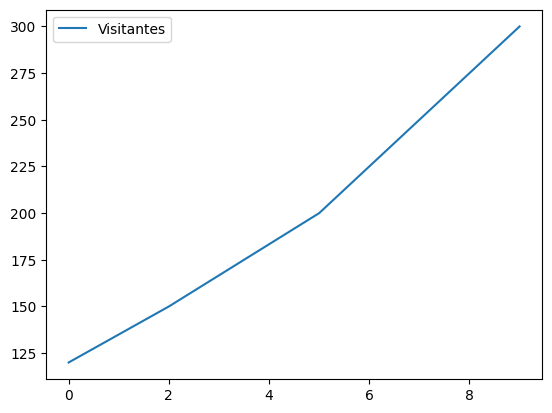

In [45]:
df_visita.plot()

In [46]:
df_visita = pd.read_csv('atividades_7.csv')

In [47]:
df_visita

,ID_Cliente,Nome,Idade,Email,Telefone,Cidade
0,101,Ana,25,ana@email.com,NaN,São Paulo
1,102,João,34,NaN,NaN,Rio de Janeiro
2,103,Carol,52,NaN,NaN,Salvador
3,104,Gustavo,29,NaN,1234-5678,São Paulo
4,105,Lucas,43,NaN,NaN,Distrito Federal
5,106,Fátima,20,NaN,NaN,Campinas
6,107,Fernanda,27,NaN,NaN,Curitiba


In [49]:
df_visita.dropna(axis=1)

,ID_Cliente,Nome,Idade,Cidade
0,101,Ana,25,São Paulo
1,102,João,34,Rio de Janeiro
2,103,Carol,52,Salvador
3,104,Gustavo,29,São Paulo
4,105,Lucas,43,Distrito Federal
5,106,Fátima,20,Campinas
6,107,Fernanda,27,Curitiba


In [52]:
df_eventos = pd.read_csv('atividades_8.csv')
df_eventos

,ID_Evento,Nome_Evento,Data,Local,Participantes
0,1,Show de Rock,2025-02-01,São Paulo,500.0
1,2,Feira de Tecnologia,NaN,NaN,2000.0
2,3,NaN,2025-02-10,Rio de Janeiro,NaN
3,4,Maratona,NaN,NaN,300.0
4,5,Seminário,2025-03-05,Belo Horizonte,NaN
5,6,NaN,2025-03-15,Curitiba,150.0


In [54]:
df_eventos.dropna(subset=['Data','Local'],inplace=True)

In [56]:
df_alunos = pd.read_csv('atividades_9.csv')
df_alunos

,ID_Aluno,Nome,Curso,Horas_Estudo,Nota_Final,Status,Avaliação_Aluno,Data_Conclusão
0,1.0,Pedro Souza,Python para Iniciantes,10.0,8.5,Aprovado,5.0,2025-01-01
1,2.0,Ana Lima,Data Science Avançado,15.0,9.0,Aprovado,4.0,2025-01-02
2,3.0,João Santos,Machine Learning,20.0,9.5,Aprovado,5.0,2025-01-03
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Lucas Pereira,Visualização de Dados,12.0,8.0,Aprovado,4.0,2025-01-05
5,6.0,Fernanda Silva,Estatística Aplicada,18.0,9.2,Aprovado,5.0,2025-01-06
6,7.0,Carla Ribeiro,Análise de Sentimentos,22.0,9.8,Aprovado,5.0,2025-01-07
7,8.0,Paulo Almeida,Deep Learning,30.0,10.0,Aprovado,5.0,2025-01-08
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Rafael Mendes,Big Data,16.0,8.8,Aprovado,4.0,2025-01-10


In [58]:
df_alunos.dropna(axis=0, how='all', inplace= True)

In [59]:
df_estoque = pd.read_csv('atividades_10.csv')
df_estoque

,ID_Produto,Nome_Produto,Categoria,Estoque
0,1,Smartphone Samsung Galaxy,Eletrônicos,25.0
1,2,Notebook Dell Inspiron,NaN,NaN
2,3,Headphone Sony WH-1000XM4,Eletrônicos,50.0
3,4,Smart TV LG OLED,NaN,NaN
4,5,Cafeteira Nespresso,Eletrodomésticos,NaN
5,6,Fritadeira Airfryer Mondial,NaN,NaN
6,7,Geladeira Brastemp Frost Free,Eletrodomésticos,NaN
7,8,Micro-ondas Electrolux,Eletrodomésticos,20.0
8,9,Aspirador de Pó RoboVac,NaN,NaN
9,10,Monitor Gamer Samsung,Eletrônicos,NaN


In [65]:
df_estoque.drop(axis=1,labels='Estoque',inplace=True)

In [66]:
df_estoque['Categoria'] = df_estoque['Categoria'].fillna('Não especificada')

In [67]:
df_estoque

,ID_Produto,Nome_Produto,Categoria
0,1,Smartphone Samsung Galaxy,Eletrônicos
1,2,Notebook Dell Inspiron,Não especificada
2,3,Headphone Sony WH-1000XM4,Eletrônicos
3,4,Smart TV LG OLED,Não especificada
4,5,Cafeteira Nespresso,Eletrodomésticos
5,6,Fritadeira Airfryer Mondial,Não especificada
6,7,Geladeira Brastemp Frost Free,Eletrodomésticos
7,8,Micro-ondas Electrolux,Eletrodomésticos
8,9,Aspirador de Pó RoboVac,Não especificada
9,10,Monitor Gamer Samsung,Eletrônicos
